In [2]:
from huggingface_hub import HfApi
import os
from datasets import  load_dataset, Dataset, DatasetDict, Image
from itertools import islice
from IPython.display import display

c:\Users\yasse\Documents\UNI\Master\DS\ADSDB\project\adsdb-multimodal-food-data-management\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
TOKEN=os.getenv("HF_TOKEN")
REPO_ID=os.getenv("HF_TOKEN")

api = HfApi(token=TOKEN)

In [4]:
streamed = load_dataset("stzhao/movie_posters_100k_controlnet", split="train", streaming=True)
subset = list(islice(streamed, 10))
print(subset[0])

{'id': 937249, 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=500x750 at 0x2238756D3D0>, 'title': '57 Seconds', 'genres': [{'id': 53, 'name': 'Thriller'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 28, 'name': 'Action'}], 'overview': 'When a tech blogger lands an interview with a tech guru and stops an attack on him, he finds a mysterious ring that takes him back 57 seconds into the past.', 'popularity': 1036.051, 'release_date': '2023-09-29', 'budget': 0, 'revenue': 0, 'tagline': 'Rewind the past. Avenge the future.', 'original_language': 'en', 'runtime': 99, 'image_width': 500, 'image_height': 750, 'ocr_result_rendered_image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=500x750 at 0x22389B032F0>, 'caption': 'Title: 57 Seconds\nGenres: Thriller, Science Fiction, Action', 'caption_with_overview': 'Title: 57 Seconds\nGenres: Thriller, Science Fiction, Action\nOverview: When a tech blogger lands an interview with a tech guru and stops an attack on him, he find

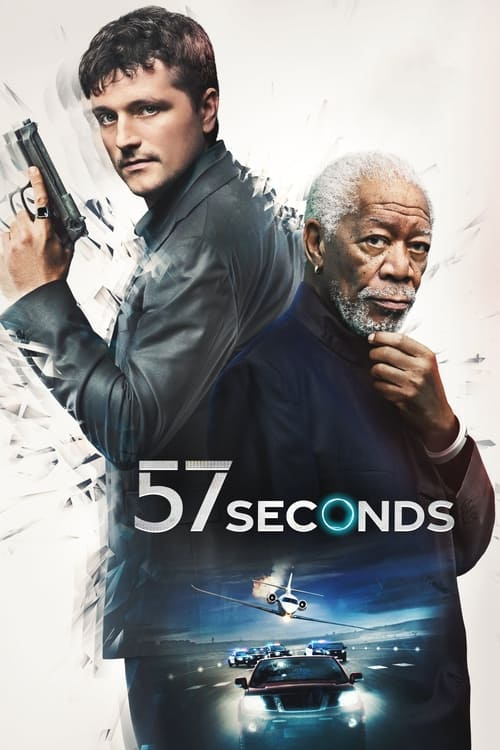

In [5]:
img = subset[0]["image"]
display(img if hasattr(img, "size") else img["path"])

In [6]:
ds = Dataset.from_list(subset)

for col in ["image", "ocr_result_rendered_image"]:
    if col in ds.column_names:
        ds = ds.cast_column(col, Image())

dset = DatasetDict({"train": ds})

In [ ]:
#dset.push_to_hub(REPO_ID, private=True, token=TOKEN)

In [ ]:
#my = load_dataset(REPO_ID, token=TOKEN)

In [7]:
import s3fs
fs = s3fs.S3FileSystem(
    key="minio",
    secret="minio12345",
    client_kwargs={"endpoint_url": "http://localhost:9000"}
)
print(fs.ls("landing-zone/"))

FileNotFoundError: The specified bucket does not exist